
# || The Sparks Foundation || GRIPJAN21
## NAME: Gaurav Singh
## Task 4 : Implement a real time face mask detector.
# Face Mask Detection


### In this project we are detect mask using Keras (Deep learning) TensorFlow library.

#### In this project we are using this dataset [Here](https://github.com/prajnasb/observations/tree/master/experiements).

In [1]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')  

Mounted at /content/gdrive


In [2]:
#importing dependencies
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import cv2                       
import os

In [3]:
# Data preprocessing
count=0
dir='/content/gdrive/My Drive/observations-master/experiements/dest_folder/train'
for items in os.listdir(dir):
  #getting the total number of files in the training directory
  for item in os.listdir(os.path.join(dir,items)):
     count=count+1
  print("There are ",count," files in training",items)
  count=0

dir='/content/gdrive/My Drive/observations-master/experiements/dest_folder/val'
for items in os.listdir(dir):
  #getting the total number of files in the test directory
  for item in os.listdir(os.path.join(dir,items)):
     count=count+1
  print("There are ",count," files in validation",items)
  count=0


There are  658  files in training with_mask
There are  657  files in training without_mask
There are  71  files in validation without_mask
There are  71  files in validation with_mask


In [4]:
categories=os.listdir(dir)
label_pics=[i for i in range(len(categories))]
#creating a label dictionary for future references
label=dict(zip(label_pics,categories))
label

{0: 'without_mask', 1: 'with_mask'}

In [5]:
train_data='/content/gdrive/My Drive/observations-master/experiements/dest_folder/train'
val_data='/content/gdrive/My Drive/observations-master/experiements/dest_folder/val'
test_data="/content/gdrive/My Drive/observations-master/experiements/dest_folder/test"

#getting and augmenting our training data for better accuracy
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')                                  

val_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_data,    
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  target_size=(300,300))

#getting our testing data along with folder and subfolder names
val_generator=val_datagen.flow_from_directory(val_data,           
                                                batch_size=20,
                                                class_mode='categorical',
                                                target_size=(300,300))

Found 1315 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [6]:
model=Sequential([
                  #Conv Layer 1
                  Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),
                  #MaxPooling layer 1
                  MaxPooling2D(2,2),

                  #Conv Layer 2
                  Conv2D(64,(3,3),activation='relu'),
                  #MaxPooling Layer 2                                   
                  MaxPooling2D(2,2),

                  #Conv Layer 3                                           
                  Conv2D(128,(3,3),activation='relu'),
                  #MaxPooling layer 3                          
                  MaxPooling2D(2,2), 

                  #Conv layer 4                                          
                  Conv2D(256,(3,3),activation='relu'),
                  #MaxPooling layer 4                         
                  MaxPooling2D(2,2),  

                  #First fully Connected Layer                                            
                  Flatten(), 
                  #30% Dropout                                                       
                  Dropout(0.3), 

                  #Second fully Connected Layer                                               
                  Dense(128,activation='relu'),  
                  #2 Feature-Output layer                       
                  Dense(2,activation='softmax')                                    
                  ])

In [7]:
#Show model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 256)       2

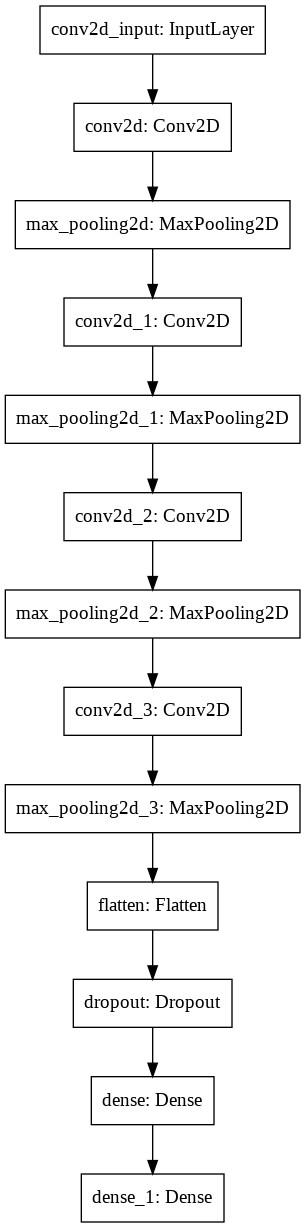

In [8]:
# Plot the Model
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="fcae mask detection architecture.png")

In [9]:
#compiling model with these Hyperparameters
#used for tuning purposes only
#from tensorflow.keras.optimizers import RMSprop                      
model.compile(optimizer='adam',                                       
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Training starts

In [10]:
epochs=10
batch_size=32
print("Traning")
history=model.fit(train_generator,
                  validation_data=val_generator,  
                  epochs=epochs,
                  validation_steps=len(val_generator) // batch_size,
                  verbose=1
                  )

print("Done")

Traning
Epoch 1/10
66/66 [==============================] - 346s 5s/step - loss: 0.7178 - accuracy: 0.5420
Epoch 2/10
66/66 [==============================] - 31s 463ms/step - loss: 0.3066 - accuracy: 0.8834
Epoch 3/10
66/66 [==============================] - 31s 463ms/step - loss: 0.2432 - accuracy: 0.9172
Epoch 4/10
66/66 [==============================] - 31s 462ms/step - loss: 0.2090 - accuracy: 0.9260
Epoch 5/10
66/66 [==============================] - 31s 462ms/step - loss: 0.1852 - accuracy: 0.9368
Epoch 6/10
66/66 [==============================] - 31s 462ms/step - loss: 0.1673 - accuracy: 0.9418
Epoch 7/10
66/66 [==============================] - 31s 462ms/step - loss: 0.1821 - accuracy: 0.9369
Epoch 8/10
66/66 [==============================] - 31s 464ms/step - loss: 0.1858 - accuracy: 0.9302
Epoch 9/10
66/66 [==============================] - 31s 460ms/step - loss: 0.1061 - accuracy: 0.9630
Epoch 10/10
66/66 [==============================] - 30s 460ms/step - loss: 0.1380 - 

In [11]:
 #evaluating our model based on the test data
eval=model.evaluate(val_generator)                           
print("Loss is : ",eval[0])
print("Accuracy is : ",eval[1])

8/8 [==============================] - 24s 3s/step - loss: 0.0107 - accuracy: 1.0000
Loss is :  0.010748355649411678
Accuracy is :  1.0


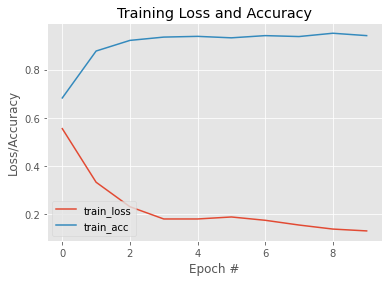

In [12]:
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])
plt.show()

In [54]:
#saving our model
model.save('/content/gdrive/My Drive/mask_trained2.h5')        

# Testing 

In [62]:
#importing libaries
import matplotlib.pyplot as plt
import numpy as np 
from google.colab.patches import cv2_imshow 

Result: without_mask


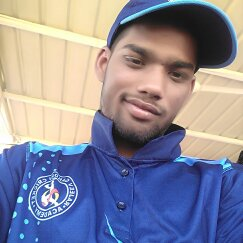

In [63]:
#testing on random images                              
face_img=cv2.imread('/content/gdrive/My Drive/gau.jpg')   
#plt.imshow(face_img)
#plt.show()

#resizing as per our input size
res=cv2.resize(face_img,(300,300)) 
#reshaping the image                          
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3)) 
#gives us 2 probabilities that sum to 1                   
result=model.predict(reshaped_final)  
#getting the max of the two probabilities           ,                      
highest_pred=np.argmax(result,axis=1)[0]
print("===================")                             
print("Result:",label[highest_pred]) 
print("===================")
cv2_imshow(face_img)

Result: with_mask


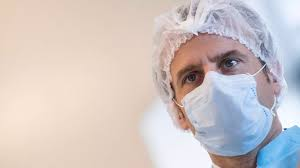

In [64]:
#testing on random images                              
face_img=cv2.imread('/content/gdrive/My Drive/with mask1.jpg')   
#plt.imshow(face_img)
#plt.show()

#resizing as per our input size
res=cv2.resize(face_img,(300,300)) 
#reshaping the image                          
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3)) 
#gives us 2 probabilities that sum to 1                   
result=model.predict(reshaped_final)  
#getting the max of the two probabilities           ,                      
highest_pred=np.argmax(result,axis=1)[0]
print("===================")                             
print("Result:",label[highest_pred]) 
print("===================")
cv2_imshow(face_img)

Result: without_mask


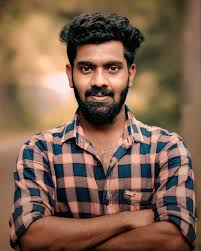

In [65]:
#testing on random images                              
face_img=cv2.imread('/content/gdrive/My Drive/without mask.jpg')   
#plt.imshow(face_img)
#plt.show()

#resizing as per our input size
res=cv2.resize(face_img,(300,300)) 
#reshaping the image                          
nor=res/255.0
reshaped_final=np.reshape(nor,(1,300,300,3)) 
#gives us 2 probabilities that sum to 1                   
result=model.predict(reshaped_final)  
#getting the max of the two probabilities           ,                      
highest_pred=np.argmax(result,axis=1)[0]
print("===================")                             
print("Result:",label[highest_pred]) 
print("===================")
cv2_imshow(face_img)

# Thank You